<a href="https://colab.research.google.com/github/Ashik9576/Hotel-Booking-Analysis/blob/main/Copy_of_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [2]:
#importing all essential libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# mounting google colab with google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#loading a CSV file(Hotel Bookings.csv) to a Variable(hotel_booking)
hotel_booking = pd.read_csv('/content/drive/MyDrive/Hotel Booking Analysis - Ashik Kumar/Hotel Bookings.csv')

In [5]:
#analysing the first five row 
hotel_booking.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
#analysing last five rows
hotel_booking.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [7]:
hotel_booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
#analysing the shape of the csv file which contained 119390 rows and 32 columns
hotel_booking.shape

(119390, 32)

In [9]:
#analysing the columns name
hotel_booking.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

# **Motivation**
To analyse the market precisely, we have planned to bifurcate the analysis into a set of questions on which we would work up on,

# **1. Which year had the most bookings?**

In [10]:
most_booking=hotel_booking.groupby('arrival_date_year')['hotel'].count()
most_booking

arrival_date_year
2015    21996
2016    56707
2017    40687
Name: hotel, dtype: int64

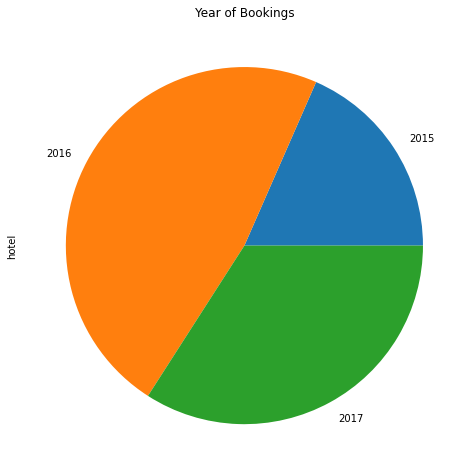

In [11]:
d=most_booking.plot(kind='pie', figsize = (8,10), title = 'Year of Bookings')

 The above diagram present the year 2016 had the most number of bookings than 
other years.

# **2.Let's find which hotel has the most number of bookings throughout?**

In [12]:
obj=[]
for i in hotel_booking:
  if hotel_booking[i].dtype=='O':
    obj.append(i)
print(len(obj))
print(obj)

12
['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date']


In [13]:
Number_hotel_booking=hotel_booking.groupby('hotel')['hotel'].count()
Number_hotel_booking

hotel
City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

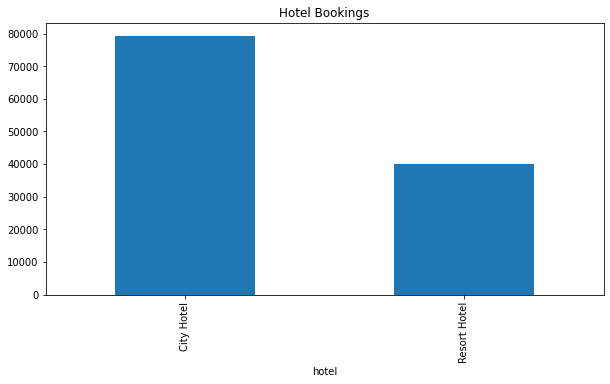

In [14]:
b=Number_hotel_booking.plot(kind='bar', title = 'Hotel Bookings', figsize=(10,5))

According to bar chart the number of booking in City Hotel is almost double than Resort Hotel.


# **3.In which month the most number of guest come in both hotels.**

In [15]:
resort_hotel=hotel_booking[(hotel_booking['hotel']=='Resort Hotel')&(hotel_booking['is_canceled']==0)]
city_hotel=hotel_booking[(hotel_booking['hotel']=='City Hotel')&(hotel_booking['is_canceled']==0)]



In [16]:
resort_guests = resort_hotel['arrival_date_month'].value_counts().reset_index()
resort_guests.columns=['month','no of guests']
resort_guests

,month,no of guests
0,August,3257
1,July,3137
2,October,2577
3,March,2573
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2038
9,December,2017


In [17]:
city_guests = city_hotel['arrival_date_month'].value_counts().reset_index()
city_guests.columns=['month','no of guests']
city_guests

,month,no of guests
0,August,5381
1,July,4782
2,May,4579
3,June,4366
4,October,4337
5,September,4290
6,March,4072
7,April,4015
8,February,3064
9,November,2696


In [18]:
both_guests = resort_guests.merge(city_guests,on='month')
both_guests.columns=['month','no_of_guests_in_resort_hotel','no_of_guest_in_city_hotel']
both_guests

,month,no_of_guests_in_resort_hotel,no_of_guest_in_city_hotel
0,August,3257,5381
1,July,3137,4782
2,October,2577,4337
3,March,2573,4072
4,April,2550,4015
5,May,2535,4579
6,February,2308,3064
7,September,2102,4290
8,June,2038,4366
9,December,2017,2392


Text(0.5, 0, 'Month')

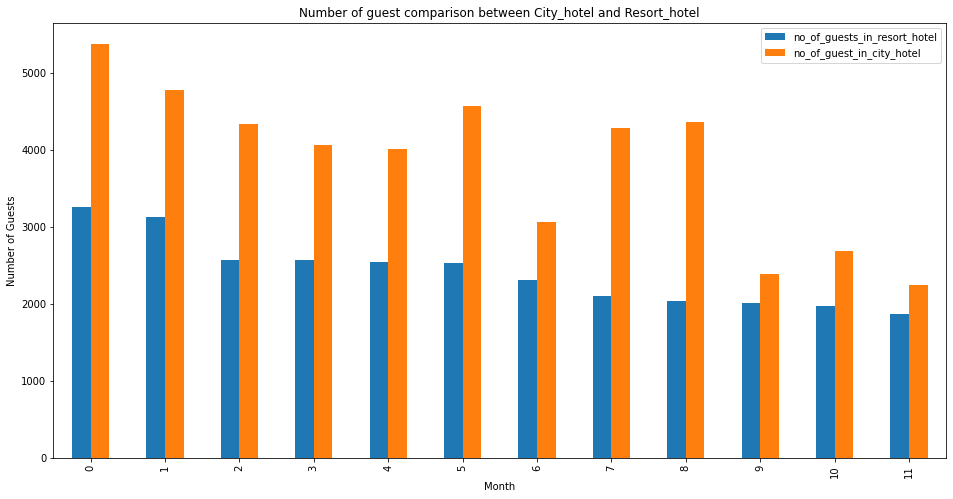

In [19]:
both_guests.plot(kind = 'bar', figsize = (16,8), title = 'Number of guest comparison between City_hotel and Resort_hotel')
plt.ylabel("Number of Guests")
plt.xlabel("Month")

It seems the number of guest in City Hotel and Resort Hotel are maximum in August.

# **4. How many kids do we have among the hotels?**

In [20]:
no_of_children = hotel_booking.groupby('hotel')['children'].sum()
no_of_children

hotel
City Hotel      7248.0
Resort Hotel    5155.0
Name: children, dtype: float64

Text(0, 0.5, 'Children Count')

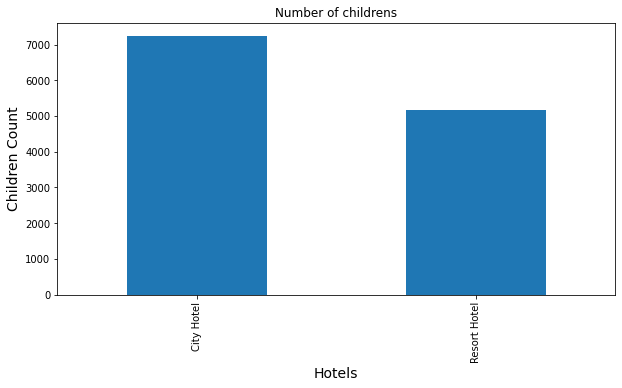

In [21]:
b=no_of_children.plot(kind='bar', title = 'Number of childrens', figsize=(10,5))
# Setting the label for x-axis
plt.xlabel("Hotels", size=14)

# Setting the label for y-axis
plt.ylabel("Children Count", size=14)

# **5. Which types of meals that the corporates prefer in guests visit?**

In [22]:
c_meal = hotel_booking.loc[hotel_booking['market_segment'] == 'Corporate', ['market_segment','meal']]

In [23]:
cm = c_meal.groupby(['meal'])['meal'].count()
cm

meal
BB           5150
FB             14
HB             83
SC             33
Undefined      15
Name: meal, dtype: int64

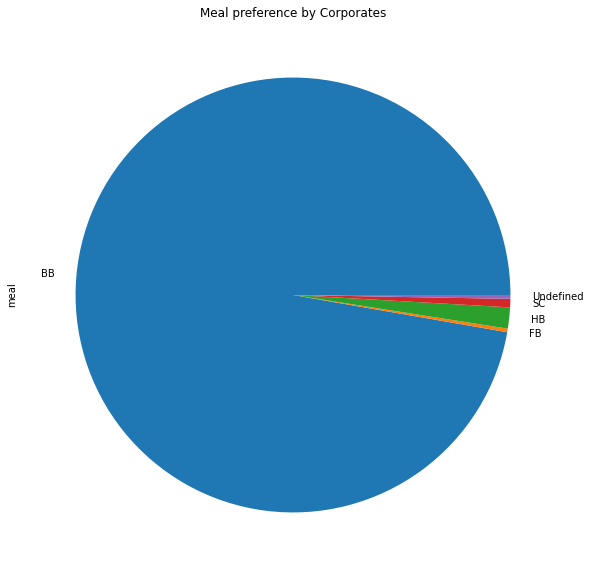

In [24]:
d=cm.plot(kind='pie', figsize = (10,10), title = 'Meal preference by Corporates')

It seems BB(meal) is the most preferable meal than the other meal. 

# **6. Percentage of  guests prefer to visit repetitively?**

In [25]:
hotel_booking.groupby(['is_repeated_guest'])['is_repeated_guest'].count()

is_repeated_guest
0    115580
1      3810
Name: is_repeated_guest, dtype: int64

Text(0.5, 1.0, 'Proportion of Repeated Guests')

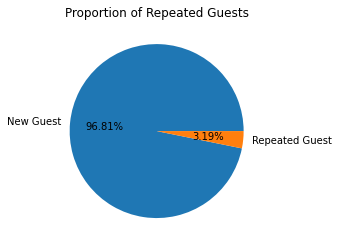

In [26]:
plt.pie(hotel_booking["is_repeated_guest"].value_counts(), labels=["New Guest","Repeated Guest"],autopct='%2.2f%%')
plt.title ("Proportion of Repeated Guests")

Only 3.19 percent guests prefered to visit repetitively and 96.81 percent is new guests.

# **7. Which country has more number of repeated guests?**

In [29]:
repeated_guest=pd.DataFrame(hotel_booking[hotel_booking["is_repeated_guest"]==1].groupby("country").count()["hotel"].sort_values(ascending=False).head(10))
repeated_guest.reset_index(inplace=True)

In [30]:
repeated_guest

,country,hotel
0,PRT,3250
1,GBR,107
2,ESP,90
3,FRA,78
4,ITA,40
5,IRL,31
6,DEU,25
7,NLD,20
8,USA,19
9,AGO,18


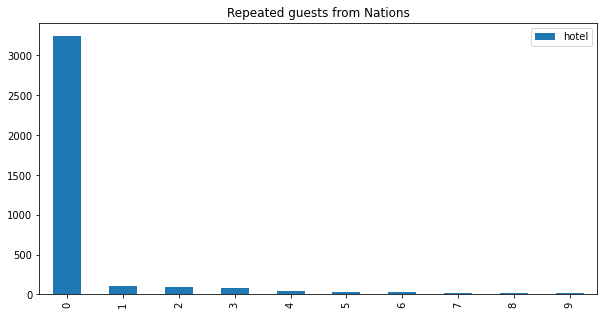

In [31]:
repeated_guest.plot(kind='bar', figsize = (10,5), title = 'Repeated guests from Nations')

PRT(Portuguese) has the most number of repeated guests.